#INTRODUCCIÓN#

Este proyecto consiste en preparar los datos de la empresa Telecom X para el modelado mediante su tratamiento, codificación y normalización, seguido de un análisis de correlación y la selección de variables más relevantes. Posteriormente, se entrenan dos o más modelos de clasificación y se evalúa su rendimiento utilizando métricas adecuadas. Una vez obtenidos los resultados, se interpretan considerando la importancia de las variables, para finalmente elaborar una conclusión estratégica que señale los principales factores que influyen en la cancelación.

##PREPARACIÓN DE LOS DATOS##

##Extracción del Archivo Tratado##

In [1]:
import pandas as pd

In [2]:
datos = pd.read_csv('/content/datos_tratados (1).csv')

In [3]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 44 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   customerID                               7032 non-null   object 
 1   Churn                                    7032 non-null   int64  
 2   gender                                   7032 non-null   int64  
 3   SeniorCitizen                            7032 non-null   int64  
 4   Partner                                  7032 non-null   int64  
 5   Dependents                               7032 non-null   int64  
 6   tenure                                   7032 non-null   int64  
 7   PaperlessBilling                         7032 non-null   int64  
 8   Charges.Monthly                          7032 non-null   float64
 9   Charges.Total                            7032 non-null   float64
 10  PhoneService_No                          7032 no

In [4]:
datos.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PaperlessBilling,Charges.Monthly,Charges.Total,...,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Cuentas_Diarias
0,0002-ORFBO,0,1,0,1,1,9,1,65.6,593.30,...,False,False,False,True,False,False,False,False,True,2.16
1,0003-MKNFE,0,0,0,0,0,9,0,59.9,542.40,...,False,True,True,False,False,False,False,False,True,1.97
2,0004-TLHLJ,1,0,0,0,0,4,1,73.9,280.85,...,False,False,True,False,False,False,False,True,False,2.43
3,0011-IGKFF,1,0,1,1,0,13,1,98.0,1237.85,...,False,True,True,False,False,False,False,True,False,3.22
4,0013-EXCHZ,1,1,1,1,0,3,1,83.9,267.40,...,False,False,True,False,False,False,False,False,True,2.76


##Encoding##

In [5]:
datos ['PhoneService_No']= datos['PhoneService_No'].replace({False:0, True:1})
datos ['PhoneService_Yes']= datos['PhoneService_Yes'].replace({False:0, True:1})
datos['MultipleLines_No'] = datos['MultipleLines_No'].replace({False:0, True:1})
datos['MultipleLines_No phone service'] = datos['MultipleLines_No phone service'].replace({False:0, True:1})
datos['MultipleLines_Yes'] = datos['MultipleLines_Yes'].replace({False:0, True:1})
datos['InternetService_DSL'] = datos['InternetService_DSL'].replace({False:0, True:1})
datos['InternetService_Fiber optic'] = datos['InternetService_Fiber optic'].replace({False:0, True:1})
datos['InternetService_No'] = datos['InternetService_No'].replace({False:0, True:1})
datos['OnlineSecurity_No'] = datos['OnlineSecurity_No'].replace({False:0, True:1})
datos['OnlineSecurity_No internet service'] = datos['OnlineSecurity_No internet service'].replace({False:0, True:1})
datos['OnlineSecurity_Yes'] = datos['OnlineSecurity_Yes'].replace({False:0, True:1})
datos['OnlineBackup_No'] = datos['OnlineBackup_No'].replace({False:0, True:1})
datos['OnlineBackup_No internet service'] = datos['OnlineBackup_No internet service'].replace({False:0, True:1})
datos['OnlineBackup_Yes'] = datos['OnlineBackup_Yes'].replace({False:0, True:1})
datos['DeviceProtection_No'] = datos['DeviceProtection_No'].replace({False:0, True:1})
datos['DeviceProtection_No internet service'] = datos['DeviceProtection_No internet service'].replace({False:0, True:1})
datos['DeviceProtection_Yes'] = datos['DeviceProtection_Yes'].replace({False:0, True:1})
datos['TechSupport_No'] = datos['TechSupport_No'].replace({False:0, True:1})
datos['TechSupport_No internet service'] = datos['TechSupport_No internet service'].replace({False:0, True:1})
datos['TechSupport_Yes'] = datos['TechSupport_Yes'].replace({False:0, True:1})
datos['StreamingTV_No'] = datos['StreamingTV_No'].replace({False:0, True:1})
datos['StreamingTV_No internet service'] = datos ['StreamingTV_No internet service'].replace({False:0, True:1})
datos['StreamingTV_Yes'] = datos['StreamingTV_Yes'].replace({False:0, True:1})
datos['StreamingMovies_No'] = datos['StreamingMovies_No'].replace({False:0, True:1})
datos['StreamingMovies_No internet service'] = datos['StreamingMovies_No internet service'].replace({False:0, True:1})
datos['StreamingMovies_Yes'] = datos['StreamingMovies_Yes'].replace({False:0, True:1})
datos['Contract_Month-to-month'] = datos['Contract_Month-to-month'].replace({False:0, True:1})
datos['Contract_One year'] = datos['Contract_One year'].replace({False:0, True:1})
datos['Contract_Two year'] = datos['Contract_Two year'].replace({False:0, True:1})
datos['PaymentMethod_Bank transfer (automatic)'] = datos['PaymentMethod_Bank transfer (automatic)'].replace({False:0, True:1})
datos['PaymentMethod_Credit card (automatic)'] = datos['PaymentMethod_Credit card (automatic)'].replace({False:0, True:1})
datos['PaymentMethod_Electronic check'] = datos['PaymentMethod_Electronic check'].replace({False:0, True:1})
datos['PaymentMethod_Mailed check'] = datos['PaymentMethod_Mailed check'].replace({False:0, True:1})
datos.sample(10)

/tmp/ipython-input-2552457815.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  datos ['PhoneService_No']= datos['PhoneService_No'].replace({False:0, True:1})
/tmp/ipython-input-2552457815.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  datos ['PhoneService_Yes']= datos['PhoneService_Yes'].replace({False:0, True:1})
/tmp/ipython-input-2552457815.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=F

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PaperlessBilling,Charges.Monthly,Charges.Total,...,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Cuentas_Diarias
5781,8152-VETUR,0,1,0,1,0,72,1,97.70,6869.70,...,0,1,0,0,1,0,1,0,0,3.21
5433,7663-YJHSN,0,1,0,1,0,72,1,103.95,7556.90,...,0,0,0,0,1,1,0,0,0,3.41
1799,2632-TACXW,0,1,0,1,0,62,0,23.65,1416.75,...,1,0,0,0,1,1,0,0,0,0.78
4827,6817-WTYHE,0,0,0,0,0,2,0,44.90,111.05,...,0,0,1,0,0,1,0,0,0,1.48
5658,7993-PYKOF,1,0,0,1,0,8,0,75.00,632.95,...,0,0,1,0,0,0,0,1,0,2.46
3161,4547-KQRTM,1,1,0,0,0,10,1,80.05,830.70,...,0,0,1,0,0,1,0,0,0,2.63
5542,7817-OMJNA,0,0,0,0,0,14,0,20.40,275.70,...,1,0,0,1,0,1,0,0,0,0.67
568,0836-SEYLU,1,0,0,1,0,9,0,40.65,328.95,...,0,0,1,0,0,0,0,0,1,1.34
5369,7594-RQHXR,1,1,0,0,1,1,1,79.60,79.60,...,0,1,1,0,0,0,0,1,0,2.61
3297,4712-AUQZO,0,0,0,0,0,18,0,33.60,550.35,...,0,0,1,0,0,0,0,0,1,1.10


In [6]:
datos.describe()


,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PaperlessBilling,Charges.Monthly,Charges.Total,PhoneService_No,...,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Cuentas_Diarias
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,...,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.265785,0.495307,0.162400,0.482509,0.298493,32.421786,0.592719,64.798208,2283.300441,0.096701,...,0.216155,0.388367,0.551052,0.209329,0.239619,0.219283,0.216297,0.336320,0.228100,2.128719
std,0.441782,0.500014,0.368844,0.499729,0.457629,24.545260,0.491363,30.085974,2266.771362,0.295571,...,0.411650,0.487414,0.497422,0.406858,0.426881,0.413790,0.411748,0.472483,0.419637,0.988302
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.250000,18.800000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.600000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,35.587500,401.450000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.170000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,70.350000,1397.475000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.310000
75%,1.000000,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,89.862500,3794.737500,0.000000,...,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.950000
max,1.000000,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,118.750000,8684.800000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.900000


In [7]:
datos.describe(include='O')


,customerID
count,7032
unique,7032
top,9995-HOTOH
freq,1


##Eliminación de columnas irrelevantes##

In [8]:
df = datos.drop(columns=['customerID', 'Cuentas_Diarias'])
df.sample(10)

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PaperlessBilling,Charges.Monthly,Charges.Total,PhoneService_No,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
3798,0,1,0,0,0,3,0,64.60,174.20,0,...,1,0,0,1,0,0,0,0,1,0
6105,0,1,0,0,0,3,0,44.75,148.05,0,...,1,0,0,1,0,0,0,0,0,1
1415,0,0,0,1,0,17,1,96.65,1588.25,0,...,0,0,1,0,1,0,1,0,0,0
3682,0,0,0,0,1,33,0,34.05,1113.95,1,...,1,0,0,0,1,0,0,1,0,0
5231,0,1,0,1,1,2,1,30.25,63.75,1,...,1,0,0,1,0,0,0,0,0,1
3274,0,1,1,1,0,42,1,95.55,3930.60,0,...,1,0,0,1,0,0,0,0,1,0
6143,0,0,0,0,0,42,1,19.55,839.40,0,...,0,1,0,0,1,0,0,0,0,1
3801,1,0,1,0,0,9,1,84.40,732.50,0,...,0,0,1,1,0,0,0,1,0,0
1456,0,1,0,1,0,40,0,63.90,2635.00,0,...,1,0,0,0,1,0,1,0,0,0
5512,1,0,1,1,0,10,1,86.65,856.65,0,...,0,0,1,1,0,0,0,0,1,0


##Normalización##

In [9]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler


In [10]:
X = df.drop(['Churn'], axis=1)
y = df['Churn']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y,  random_state = 5)


In [12]:
normalizacion = MinMaxScaler()
X_train_normalizado = normalizacion.fit_transform(X_train)

In [13]:
datos_normalizados = pd.DataFrame(X_train_normalizado)
pd.DataFrame(X_train_normalizado)



,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,40
0,0.0,0.0,1.0,0.0,0.985915,0.0,0.465869,0.538071,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.971831,1.0,0.715994,0.734726,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,1.0,0.0,1.0,0.0,0.802817,1.0,0.907324,0.706870,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
3,1.0,0.0,1.0,0.0,0.830986,0.0,0.413054,0.399795,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
4,0.0,1.0,1.0,0.0,0.394366,1.0,0.757848,0.304041,0.0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5269,0.0,0.0,1.0,0.0,0.619718,0.0,0.627803,0.433536,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
5270,1.0,1.0,0.0,0.0,0.577465,0.0,0.371201,0.277281,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
5271,1.0,0.0,1.0,1.0,0.619718,1.0,0.015944,0.100110,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
5272,1.0,0.0,0.0,0.0,0.394366,1.0,0.475336,0.218476,0.0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


#Correlación y selección de variables#

In [14]:
corr = df.corr()

In [15]:
corr['Churn']
corr_churn = df.corr(numeric_only=True)['Churn'].drop('Churn').sort_values(ascending=False)
print(corr_churn)

Contract_Month-to-month                    0.404565
OnlineSecurity_No                          0.342235
TechSupport_No                             0.336877
InternetService_Fiber optic                0.307463
PaymentMethod_Electronic check             0.301455
OnlineBackup_No                            0.267595
DeviceProtection_No                        0.252056
Charges.Monthly                            0.192858
PaperlessBilling                           0.191454
SeniorCitizen                              0.150541
StreamingMovies_No                         0.130920
StreamingTV_No                             0.128435
StreamingTV_Yes                            0.063254
StreamingMovies_Yes                        0.060860
MultipleLines_Yes                          0.040033
PhoneService_Yes                           0.011691
gender                                     0.008545
PhoneService_No                           -0.011691
MultipleLines_No phone service            -0.011691
MultipleLine

#Análisis dirigido#

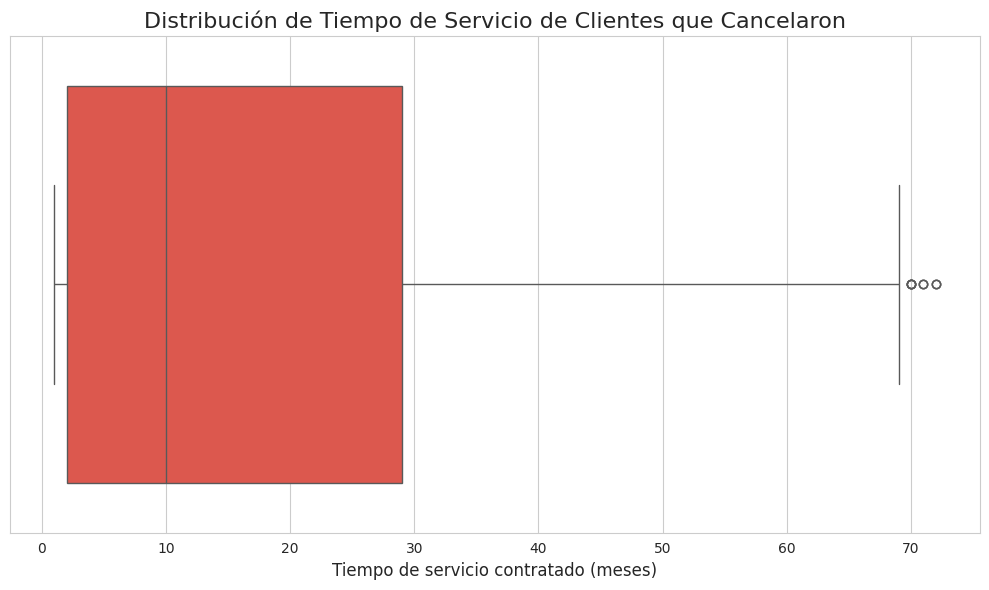

In [16]:
# Filtrar solo clientes que cancelaron
df_churn = df[df["Churn"] == 1]

# Configuración de estilo
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))

# Boxplot horizontal de tenure para clientes que cancelaron
sns.boxplot(
    x="tenure",
    data=df_churn,
    color="#F44336",  # Rojo para resaltar Churn
    showfliers=True,
    flierprops=dict(marker='o', color='blue', alpha=0.5),
    orient="h"
)

# Títulos y etiquetas
plt.title("Distribución de Tiempo de Servicio de Clientes que Cancelaron", fontsize=16)
plt.xlabel("Tiempo de servicio contratado (meses)", fontsize=12)
plt.yticks([])  # Sin etiquetas en y, ya que solo hay un grupo
plt.tight_layout()
plt.show()


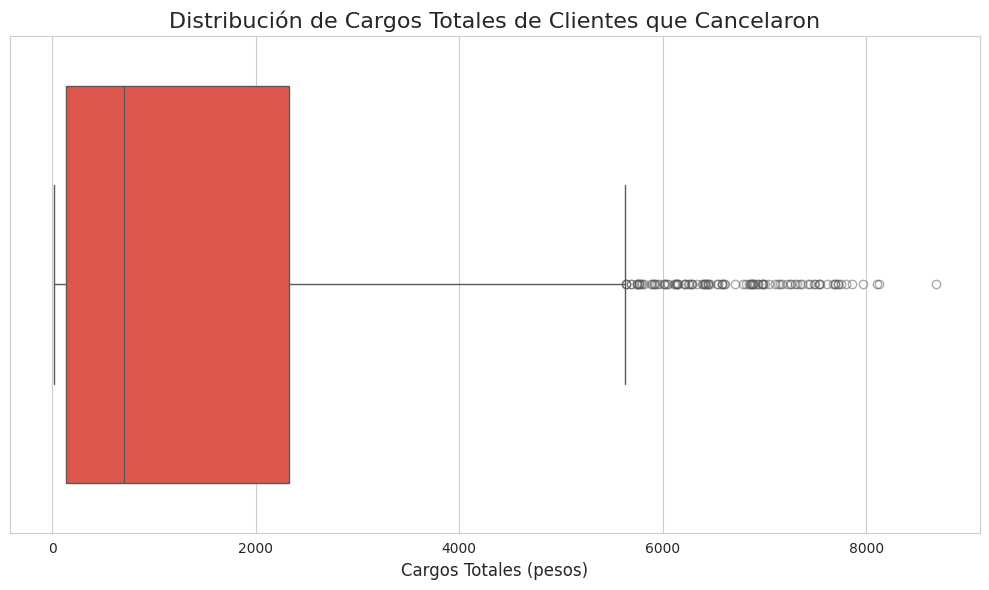

In [17]:
# Filtrar solo clientes que cancelaron
df_churn = df[df["Churn"] == 1]

# Configuración de estilo
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))

# Boxplot horizontal de clientes que cancelaron
sns.boxplot(
    x="Charges.Total",
    data=df_churn,
    color="#F44336",  # Rojo para resaltar Churn
    showfliers=True,
    flierprops=dict(marker='o', color='blue', alpha=0.5),
    orient="h"
)

# Títulos y etiquetas
plt.title("Distribución de Cargos Totales de Clientes que Cancelaron", fontsize=16)
plt.xlabel("Cargos Totales (pesos)", fontsize=12)
plt.yticks([])  # Sin etiquetas en y, ya que solo hay un grupo
plt.tight_layout()
plt.show()



#Modelo predictivo#

##Separación de datos##

In [18]:
from sklearn.model_selection import train_test_split


In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y,  random_state = 5)


##Creación de Modelos##

###Modelo Dummy###

In [20]:
from sklearn.dummy import DummyClassifier
dummy = DummyClassifier()
dummy.fit(X_train, y_train)

dummy.score(X_test, y_test)


0.7343572241183163

In [21]:
print(f'La exactitud del modelo es: {dummy.score(X_test,y_test)}')

La exactitud del modelo es: 0.7343572241183163


###Modelo Árbol de decisión###

In [22]:
from sklearn.model_selection import train_test_split

X = df.drop(['Churn'], axis=1)
y = df['Churn']

In [23]:
from sklearn.tree import DecisionTreeClassifier

modelo = DecisionTreeClassifier(max_depth=3, random_state=5)
modelo.fit(X,y)
modelo.score(X,y)

0.7908134243458476

In [24]:
print(f'La exactitud del modelo es: {modelo.score(X,y)}')

La exactitud del modelo es: 0.7908134243458476


###Modelo KNN###

In [25]:
pd.DataFrame(X_train_normalizado)


,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,40
0,0.0,0.0,1.0,0.0,0.985915,0.0,0.465869,0.538071,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.971831,1.0,0.715994,0.734726,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,1.0,0.0,1.0,0.0,0.802817,1.0,0.907324,0.706870,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
3,1.0,0.0,1.0,0.0,0.830986,0.0,0.413054,0.399795,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
4,0.0,1.0,1.0,0.0,0.394366,1.0,0.757848,0.304041,0.0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5269,0.0,0.0,1.0,0.0,0.619718,0.0,0.627803,0.433536,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
5270,1.0,1.0,0.0,0.0,0.577465,0.0,0.371201,0.277281,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
5271,1.0,0.0,1.0,1.0,0.619718,1.0,0.015944,0.100110,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
5272,1.0,0.0,0.0,0.0,0.394366,1.0,0.475336,0.218476,0.0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [26]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

knn = KNeighborsClassifier()
knn.fit(X_train_normalizado, y_train)


KNeighborsClassifier()

In [27]:
X_test_normalizado = normalizacion.transform(X_test)


In [28]:
knn.score(X_test_normalizado, y_test)


0.7588168373151308

In [29]:
print(f'Exactitud KNN: {knn.score(X_test_normalizado, y_test)}')


Exactitud KNN: 0.7588168373151308


##Evaluación del modelo con datos de entrenamiento y validación#


In [30]:
X,X_test,y,y_test = train_test_split(X,y,test_size=0.15,stratify=y,random_state=5)
X_train,X_val,y_train,y_val = train_test_split(X,y,stratify=y,random_state=5)

In [31]:
modelo = DecisionTreeClassifier(max_depth=3)
modelo.fit(X_train,y_train)
print(f'La exactitud del modelo con el conjunto de entrenamiento es de: {modelo.score(X_train,y_train)}')
print(f'La exactitud del modelo con el conjunto de validación es de: {modelo.score(X_val,y_val)}')

La exactitud del modelo con el conjunto de entrenamiento es de: 0.7909415439535922
La exactitud del modelo con el conjunto de validación es de: 0.7859531772575251


In [32]:
X,X_test_normalizado,y,y_test = train_test_split(X,y,test_size=0.15,stratify=y,random_state=5)
X_train,X_val,y_train,y_val = train_test_split(X,y,stratify=y,random_state=5)

In [33]:
knn.fit(X_train, y_train)

# Evaluar exactitud
print(f'Exactitud en entrenamiento: {knn.score(X_train, y_train)}')
print(f'Exactitud en validación: {knn.score(X_val, y_val)}')


Exactitud en entrenamiento: 0.8333333333333334
Exactitud en validación: 0.7645669291338583


###Matriz de Confusión###

In [34]:
from sklearn.metrics import confusion_matrix

In [35]:
y_previsto = modelo.predict(X_val)
matriz_confusion = confusion_matrix(y_val,y_previsto)
print(matriz_confusion)

[[877  55]
 [215 123]]


In [36]:
from sklearn.metrics import ConfusionMatrixDisplay

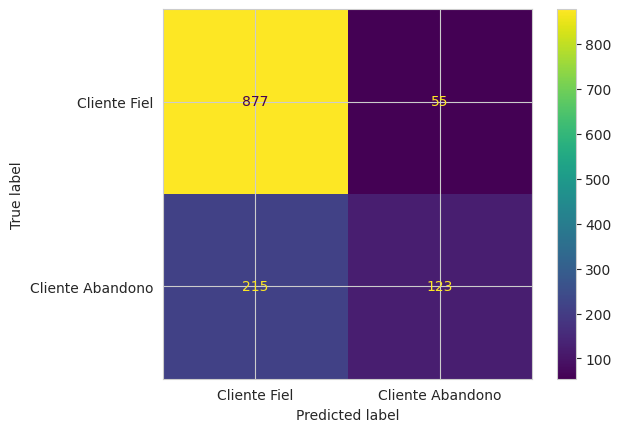

In [37]:
visualizacion = ConfusionMatrixDisplay(confusion_matrix = matriz_confusion, display_labels=['Cliente Fiel','Cliente Abandono'])
visualizacion.plot();

##Precisión, Exactitud y sensibilidad (recall)##

In [38]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [39]:
print(f'La precisión del modelo es: {precision_score(y_val,y_previsto)}')
print(f'La sensibilidad (Recall) del modelo es: {recall_score(y_val,y_previsto)}')
print(f'La exactitud (accuracy) del modelo es: {accuracy_score(y_val,y_previsto)}')

La precisión del modelo es: 0.6910112359550562
La sensibilidad (Recall) del modelo es: 0.363905325443787
La exactitud (accuracy) del modelo es: 0.7874015748031497


In [40]:
print(f'El F1-score del modelo es: {f1_score(y_val,y_previsto)}')

El F1-score del modelo es: 0.47674418604651164


In [41]:
from sklearn.metrics import classification_report

##Informe de Métricas##

In [42]:
print(classification_report(y_val,y_previsto))

              precision    recall  f1-score   support

           0       0.80      0.94      0.87       932
           1       0.69      0.36      0.48       338

    accuracy                           0.79      1270
   macro avg       0.75      0.65      0.67      1270
weighted avg       0.77      0.79      0.76      1270



###Validación Cruzada###

In [43]:
from sklearn.model_selection import KFold, cross_validate

In [44]:
modelo = DecisionTreeClassifier(max_depth=3)
kf = KFold(n_splits=5, shuffle=True,random_state=5)
cv_resultados =cross_validate(modelo,X,y,cv=kf)
cv_resultados

{'fit_time': array([0.01317549, 0.01076293, 0.01049805, 0.01113558, 0.01069093]),
 'score_time': array([0.00257802, 0.00286222, 0.00219417, 0.00233245, 0.00232339]),
 'test_score': array([0.81200787, 0.79133858, 0.79527559, 0.77165354, 0.77952756])}

In [45]:
cv_resultados['test_score']

array([0.81200787, 0.79133858, 0.79527559, 0.77165354, 0.77952756])

In [46]:
promedio = cv_resultados['test_score'].mean()
desvio_std = cv_resultados['test_score'].std()
print(f'El promedio de la exactitud es de: {promedio}')
print(f'El desvío típico es de: {desvio_std}')
print(f'El intervalo de confianza es: [{promedio-2*desvio_std},{min(promedio+2*desvio_std,1)}]')

El promedio de la exactitud es de: 0.7899606299212598
El desvío típico es de: 0.013858044021100841
El intervalo de confianza es: [0.7622445418790581,0.8176767179634615]


###Validación cruzada con Sensibilidad###

In [47]:
def intervalo_confianza(resultados):
  promedio = resultados['test_score'].mean()
  desvio_std = resultados['test_score'].std()
  return f'El intervalo de confianza es: [{promedio-2*desvio_std},{min(promedio+2*desvio_std,1)}]'

In [48]:
modelo = DecisionTreeClassifier(max_depth=3)
kf = KFold(n_splits=5, shuffle=True,random_state=5)
cv_resultados =cross_validate(modelo,X,y,cv=kf,scoring='recall')
cv_resultados

{'fit_time': array([0.01062107, 0.01219249, 0.01028371, 0.01195168, 0.01054025]),
 'score_time': array([0.00372124, 0.00385928, 0.00388885, 0.00380635, 0.00371456]),
 'test_score': array([0.44274809, 0.43006993, 0.33603239, 0.37062937, 0.36296296])}

In [49]:
intervalo_confianza(cv_resultados)

'El intervalo de confianza es: [0.3065360563674662,0.4704410412042476]'

Estratificando los datos

In [50]:
df['Churn'].value_counts(normalize=True)

,proportion
Churn,
0,0.734215
1,0.265785


In [51]:
from sklearn.model_selection import StratifiedKFold

In [52]:
modelo = DecisionTreeClassifier(max_depth=10)
skf = StratifiedKFold(n_splits=5, shuffle=True,random_state=5)
cv_resultados =cross_validate(modelo,X,y,cv=skf,scoring='recall')

In [53]:
intervalo_confianza(cv_resultados)

'El intervalo de confianza es: [0.42114756624315186,0.6151295965284758]'

##Oversampling##

In [54]:
from imblearn.over_sampling import SMOTE

In [55]:
oversampling = SMOTE()
x_balanceada,y_balanceada = oversampling.fit_resample(X,y)

In [56]:
y_balanceada.value_counts(normalize=True)


,proportion
Churn,
0,0.5
1,0.5


In [57]:
modelo = DecisionTreeClassifier(max_depth=3)
skf = StratifiedKFold(n_splits=5, shuffle=True,random_state=5)
cv_resultados =cross_validate(modelo,x_balanceada,y_balanceada,cv=skf,scoring='recall')

In [58]:
intervalo_confianza(cv_resultados)

'El intervalo de confianza es: [0.8305938454322271,0.8728100806523044]'

Pipeline para Validación

In [59]:
from imblearn.pipeline import Pipeline as imbpipeline

In [60]:
modelo = DecisionTreeClassifier(max_depth=3)
pipeline = imbpipeline([('oversample',SMOTE()),('arbol',modelo)])

In [61]:
skf = StratifiedKFold(n_splits=5, shuffle=True,random_state=5)
cv_resultados =cross_validate(pipeline,X,y,cv=skf,scoring='recall')

In [62]:
intervalo_confianza(cv_resultados)

'El intervalo de confianza es: [0.6597903684050905,0.8102273984392447]'

##Undersampling##

In [63]:
from imblearn.under_sampling import NearMiss
from sklearn.preprocessing import StandardScaler
from imblearn.under_sampling import RandomUnderSampler


In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Definir pipeline de balanceo de datos: SMOTE + undersampling
over = SMOTE(sampling_strategy=0.5, random_state=42)  # Aumentar la clase minoritaria al 50% de la mayoritaria
under = RandomUnderSampler(sampling_strategy=0.8, random_state=42)  # Reducir la clase mayoritaria
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)

X_resampled, y_resampled = pipeline.fit_resample(X_train_scaled, y_train)

# Entrenar un modelo de ejemplo
modelo = DecisionTreeClassifier(max_depth=3, random_state=42)
modelo.fit(X_resampled, y_resampled)

# Predecir sobre el conjunto de prueba
y_pred = modelo.predict(X_test_scaled)

# Evaluar desempeño
print(classification_report(y_test, y_pred))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()



AttributeError: 'Pipeline' object has no attribute 'fit_resample'

#Conclusión#

Basado en el análisis previo de correlaciones se obtiene para la variable de respuesta 'Churn' que representa las cancelaciones de clientes los siguientes puntos importantes:

1) Las variables que mas impacto tienen en las cancelaciones:

Contrato Month-to-month (mensual): fuertemente asociado a mayor churn.

Servicios de seguridad/soporte NO contratados: OnlineSecurity_No y TechSupport_No aparecen entre los impulsores positivos del churn.

InternetService_Fiber optic: se asocia a mayor churn (posible efecto de tarifas altas y sensibilidad al precio).

PaymentMethod_Electronic check: consistentemente ligado con más churn frente a pagos automáticos.

Cargos mensuales altos (Charges.Monthly): mayor importe mensual, mayor probabilidad de churn.

Antigüedad (tenure): protege contra el churn (clientes nuevos cancelan más).

Contract_Two year: contratos largos reducen el churn.

Charges.Total: tiende a ser menor entre quienes cancelan, coherente con menor antigüedad.

2) Rendimiento de modelos:

Se entrenaron y evaluaron, en conjunto de prueba, los siguientes modelos:KNN y DecissionTreeClassifier
Para este se calcularon los siguientes valores: Accuracy, Precision, Recall, F1 además de su matriz de confusión.

3) Interpretación

Las variables contractuales y de modelo de relación (tipo de contrato y forma de pago) explican gran parte del riesgo de cancelación: cuanto más flexible es el contrato y menos automatizado el pago, mayor la deserción.

Los servicios de valor agregado (seguridad en línea y soporte técnico) actúan como anclas: su ausencia incrementa el riesgo, su presencia lo reduce.

Los precios importan: clientes con cargos mensuales altos son más sensibles al churn, especialmente en los primeros meses (bajo tenure).

Tenure muestra un efecto de aprendizaje y lealtad: a mayor antigüedad, menor propensión a cancelar.

4) Estrategias de retención recomendadas

a) Diseño de ofertas y contratos

Migraciones de Month-to-month → 1–2 años con incentivos (descuento inicial, upgrades de velocidad o beneficios acumulables).

Bonificaciones por permanencia (ej. al cumplir 6 y 12 meses) para superar la “ventana crítica” de abandono temprano.

b) Valor agregado y bundles

Paquetes con OnlineSecurity y TechSupport a precio preferencial; comunicar beneficios de forma clara durante onboarding.

Cross-sell proactivo a segmentos con alto riesgo y tickets medios altos para elevar utilidad percibida y reducir sensibilidad al precio.

c) Gestión de precio y método de pago

Ofertas de retención basadas en cargos mensuales: descuentos selectivos, ajuste de plan o “holiday credits” para clientes con quejas de precio.

Campañas de cambio de método de pago: mover de Electronic check → cargo automático (banco o tarjeta) con beneficios (ej. 5–10% por 3 meses).

d) Orquestación y timing

Playbooks por antigüedad:

0–3 meses: atención reforzada, tutoriales, verificación de instalación/velocidad, NPS temprano.

3–6 meses: propuesta de valor (bundles), incentivos a permanencia.

6 meses: programas de lealtad/upgrade.

e) Alertas y seguimiento

Score de churn en producción con umbral calibrado según tu costo-beneficio (FN vs FP).

Monitoreo mensual de drivers: si sube el peso de Charges.Monthly o Month-to-month, redoblar ofertas y campañas de migración.

En conclusión los contratos mensuales, la falta de soporte/seguridad online, y pagar con cheque electrónico aumentan la probabilidad de Cancelación, mientras que mayor antigüedad, contratos largos y servicios adicionales reducen el churn.


